# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon Mar  9 11:43:30 2020


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
%config IPCompleter.greedy=True

In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()
train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()

In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


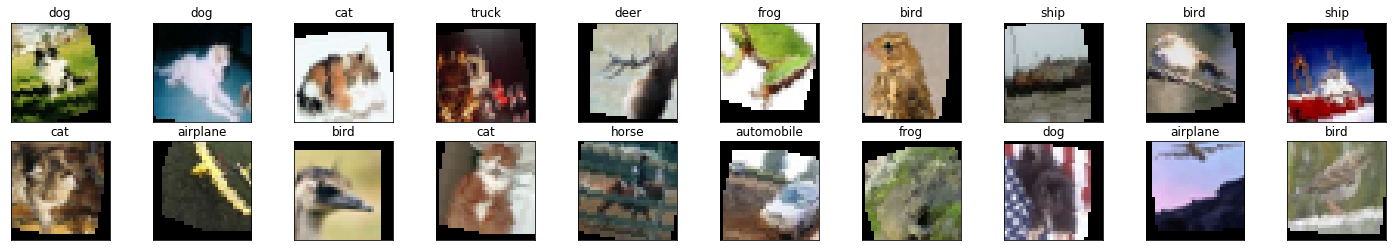

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodelresnet18()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=0)
# scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=2,
#                                         verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 250
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
#     scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.1782362461090088 Batch_id=390 Accuracy=45.10: 100%|██████████| 391/391 [00:49<00:00,  7.84it/s]



Test set: Average loss: 0.0093, Accuracy: 5919/10000 (59.19%)

Validation accuracy increased (0.000000 --> 59.190000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


Loss=1.0175179243087769 Batch_id=390 Accuracy=61.39: 100%|██████████| 391/391 [01:00<00:00,  6.44it/s]



Test set: Average loss: 0.0085, Accuracy: 6334/10000 (63.34%)

Validation accuracy increased (59.190000 --> 63.340000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


Loss=0.8588622808456421 Batch_id=390 Accuracy=68.72: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]



Test set: Average loss: 0.0067, Accuracy: 7227/10000 (72.27%)

Validation accuracy increased (63.340000 --> 72.270000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


Loss=0.660552442073822 Batch_id=390 Accuracy=73.28: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s] 



Test set: Average loss: 0.0056, Accuracy: 7601/10000 (76.01%)

Validation accuracy increased (72.270000 --> 76.010000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


Loss=0.6344107389450073 Batch_id=390 Accuracy=76.65: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s] 



Test set: Average loss: 0.0054, Accuracy: 7715/10000 (77.15%)

Validation accuracy increased (76.010000 --> 77.150000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


Loss=0.4905855059623718 Batch_id=390 Accuracy=78.66: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7703/10000 (77.03%)

Learning rate = 0.01  for epoch:  7
EPOCH: 7


Loss=0.4328981041908264 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s] 



Test set: Average loss: 0.0043, Accuracy: 8221/10000 (82.21%)

Validation accuracy increased (77.150000 --> 82.210000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


Loss=0.6050465703010559 Batch_id=390 Accuracy=81.41: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s] 



Test set: Average loss: 0.0039, Accuracy: 8314/10000 (83.14%)

Validation accuracy increased (82.210000 --> 83.140000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


Loss=0.5931054353713989 Batch_id=390 Accuracy=82.74: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8265/10000 (82.65%)

Learning rate = 0.01  for epoch:  10
EPOCH: 10


Loss=0.46290940046310425 Batch_id=390 Accuracy=83.62: 100%|██████████| 391/391 [01:07<00:00,  5.78it/s]



Test set: Average loss: 0.0037, Accuracy: 8408/10000 (84.08%)

Validation accuracy increased (83.140000 --> 84.080000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  11
EPOCH: 11


Loss=0.4176666736602783 Batch_id=390 Accuracy=84.43: 100%|██████████| 391/391 [01:08<00:00,  5.71it/s] 



Test set: Average loss: 0.0035, Accuracy: 8535/10000 (85.35%)

Validation accuracy increased (84.080000 --> 85.350000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  12
EPOCH: 12


Loss=0.5101709961891174 Batch_id=390 Accuracy=85.26: 100%|██████████| 391/391 [01:10<00:00,  5.57it/s] 



Test set: Average loss: 0.0035, Accuracy: 8549/10000 (85.49%)

Validation accuracy increased (85.350000 --> 85.490000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  13
EPOCH: 13


Loss=0.30857524275779724 Batch_id=390 Accuracy=86.27: 100%|██████████| 391/391 [01:07<00:00,  5.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8486/10000 (84.86%)

Learning rate = 0.01  for epoch:  14
EPOCH: 14


Loss=0.40627890825271606 Batch_id=390 Accuracy=86.78: 100%|██████████| 391/391 [01:08<00:00,  5.74it/s]



Test set: Average loss: 0.0031, Accuracy: 8738/10000 (87.38%)

Validation accuracy increased (85.490000 --> 87.380000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  15
EPOCH: 15


Loss=0.29624491930007935 Batch_id=390 Accuracy=86.90: 100%|██████████| 391/391 [01:07<00:00,  5.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8618/10000 (86.18%)

Learning rate = 0.01  for epoch:  16
EPOCH: 16


Loss=0.29496821761131287 Batch_id=390 Accuracy=87.57: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]



Test set: Average loss: 0.0030, Accuracy: 8780/10000 (87.80%)

Validation accuracy increased (87.380000 --> 87.800000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  17
EPOCH: 17


Loss=0.26635241508483887 Batch_id=390 Accuracy=88.28: 100%|██████████| 391/391 [01:08<00:00,  5.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8719/10000 (87.19%)

Learning rate = 0.01  for epoch:  18
EPOCH: 18


Loss=0.146612286567688 Batch_id=390 Accuracy=88.87: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8672/10000 (86.72%)

Learning rate = 0.01  for epoch:  19
EPOCH: 19


Loss=0.35222524404525757 Batch_id=390 Accuracy=88.79: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s]



Test set: Average loss: 0.0027, Accuracy: 8899/10000 (88.99%)

Validation accuracy increased (87.800000 --> 88.990000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  20
EPOCH: 20


Loss=0.2972732186317444 Batch_id=390 Accuracy=89.69: 100%|██████████| 391/391 [01:06<00:00,  5.86it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8847/10000 (88.47%)

Learning rate = 0.01  for epoch:  21
EPOCH: 21


Loss=0.3475995659828186 Batch_id=390 Accuracy=89.84: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8883/10000 (88.83%)

Learning rate = 0.01  for epoch:  22
EPOCH: 22


Loss=0.19467158615589142 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s]



Test set: Average loss: 0.0027, Accuracy: 8922/10000 (89.22%)

Validation accuracy increased (88.990000 --> 89.220000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  23
EPOCH: 23


Loss=0.3896837830543518 Batch_id=390 Accuracy=90.84: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8883/10000 (88.83%)

Learning rate = 0.01  for epoch:  24
EPOCH: 24


Loss=0.37049373984336853 Batch_id=390 Accuracy=90.77: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8905/10000 (89.05%)

Learning rate = 0.01  for epoch:  25
EPOCH: 25


Loss=0.13185641169548035 Batch_id=390 Accuracy=91.41: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s]



Test set: Average loss: 0.0026, Accuracy: 8968/10000 (89.68%)

Validation accuracy increased (89.220000 --> 89.680000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  26
EPOCH: 26


Loss=0.09834984689950943 Batch_id=390 Accuracy=91.61: 100%|██████████| 391/391 [01:06<00:00,  5.84it/s]



Test set: Average loss: 0.0026, Accuracy: 9013/10000 (90.13%)

Validation accuracy increased (89.680000 --> 90.130000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  27
EPOCH: 27


Loss=0.26393797993659973 Batch_id=390 Accuracy=91.74: 100%|██████████| 391/391 [01:07<00:00,  5.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8868/10000 (88.68%)

Learning rate = 0.01  for epoch:  28
EPOCH: 28


Loss=0.2730509042739868 Batch_id=390 Accuracy=92.08: 100%|██████████| 391/391 [01:12<00:00,  5.36it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8974/10000 (89.74%)

Learning rate = 0.01  for epoch:  29
EPOCH: 29


Loss=0.2737523913383484 Batch_id=390 Accuracy=92.42: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8983/10000 (89.83%)

Learning rate = 0.01  for epoch:  30
EPOCH: 30


Loss=0.20267195999622345 Batch_id=390 Accuracy=92.54: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 8990/10000 (89.90%)

Learning rate = 0.01  for epoch:  31
EPOCH: 31


Loss=0.1847059428691864 Batch_id=390 Accuracy=92.95: 100%|██████████| 391/391 [01:07<00:00,  5.78it/s] 



Test set: Average loss: 0.0027, Accuracy: 9014/10000 (90.14%)

Validation accuracy increased (90.130000 --> 90.140000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  32
EPOCH: 32


Loss=0.19695961475372314 Batch_id=390 Accuracy=93.27: 100%|██████████| 391/391 [01:07<00:00,  5.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8979/10000 (89.79%)

Learning rate = 0.01  for epoch:  33
EPOCH: 33


Loss=0.293678343296051 Batch_id=390 Accuracy=93.31: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s]  



Test set: Average loss: 0.0025, Accuracy: 9092/10000 (90.92%)

Validation accuracy increased (90.140000 --> 90.920000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  34
EPOCH: 34


Loss=0.21318569779396057 Batch_id=390 Accuracy=93.41: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9064/10000 (90.64%)

Learning rate = 0.01  for epoch:  35
EPOCH: 35


Loss=0.14214050769805908 Batch_id=390 Accuracy=93.51: 100%|██████████| 391/391 [01:09<00:00,  5.60it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9051/10000 (90.51%)

Learning rate = 0.01  for epoch:  36
EPOCH: 36


Loss=0.2029215544462204 Batch_id=390 Accuracy=93.77: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s] 



Test set: Average loss: 0.0025, Accuracy: 9105/10000 (91.05%)

Validation accuracy increased (90.920000 --> 91.050000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  37
EPOCH: 37


Loss=0.17317703366279602 Batch_id=390 Accuracy=94.06: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]



Test set: Average loss: 0.0026, Accuracy: 9120/10000 (91.20%)

Validation accuracy increased (91.050000 --> 91.200000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  38
EPOCH: 38


Loss=0.1519739031791687 Batch_id=390 Accuracy=94.22: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]  



Test set: Average loss: 0.0025, Accuracy: 9127/10000 (91.27%)

Validation accuracy increased (91.200000 --> 91.270000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  39
EPOCH: 39


Loss=0.11712372303009033 Batch_id=390 Accuracy=94.50: 100%|██████████| 391/391 [01:08<00:00,  5.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9094/10000 (90.94%)

Learning rate = 0.01  for epoch:  40
EPOCH: 40


Loss=0.16671690344810486 Batch_id=390 Accuracy=94.53: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 9091/10000 (90.91%)

Learning rate = 0.01  for epoch:  41
EPOCH: 41


Loss=0.1359676867723465 Batch_id=390 Accuracy=94.59: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 9123/10000 (91.23%)

Learning rate = 0.01  for epoch:  42
EPOCH: 42


Loss=0.17061485350131989 Batch_id=390 Accuracy=94.81: 100%|██████████| 391/391 [01:08<00:00,  5.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9084/10000 (90.84%)

Learning rate = 0.01  for epoch:  43
EPOCH: 43


Loss=0.20038500428199768 Batch_id=390 Accuracy=94.86: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9105/10000 (91.05%)

Learning rate = 0.01  for epoch:  44
EPOCH: 44


Loss=0.06853284686803818 Batch_id=390 Accuracy=95.25: 100%|██████████| 391/391 [01:10<00:00,  5.56it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9075/10000 (90.75%)

Learning rate = 0.01  for epoch:  45
EPOCH: 45


Loss=0.1689273864030838 Batch_id=390 Accuracy=94.99: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9070/10000 (90.70%)

Learning rate = 0.01  for epoch:  46
EPOCH: 46


Loss=0.06733402609825134 Batch_id=390 Accuracy=95.42: 100%|██████████| 391/391 [01:08<00:00,  5.70it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9015/10000 (90.15%)

Learning rate = 0.01  for epoch:  47
EPOCH: 47


Loss=0.2370453178882599 Batch_id=390 Accuracy=95.46: 100%|██████████| 391/391 [01:10<00:00,  5.54it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9060/10000 (90.60%)

Learning rate = 0.01  for epoch:  48
EPOCH: 48


Loss=0.3005962371826172 Batch_id=390 Accuracy=95.68: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]  



Test set: Average loss: 0.0027, Accuracy: 9150/10000 (91.50%)

Validation accuracy increased (91.270000 --> 91.500000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  49
EPOCH: 49


Loss=0.13513025641441345 Batch_id=390 Accuracy=95.75: 100%|██████████| 391/391 [01:10<00:00,  5.56it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9117/10000 (91.17%)

Learning rate = 0.01  for epoch:  50
EPOCH: 50


Loss=0.20762956142425537 Batch_id=390 Accuracy=95.76: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9109/10000 (91.09%)

Learning rate = 0.01  for epoch:  51
EPOCH: 51


Loss=0.23627805709838867 Batch_id=390 Accuracy=95.89: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s] 



Test set: Average loss: 0.0026, Accuracy: 9178/10000 (91.78%)

Validation accuracy increased (91.500000 --> 91.780000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  52
EPOCH: 52


Loss=0.09526120126247406 Batch_id=390 Accuracy=96.08: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9174/10000 (91.74%)

Learning rate = 0.01  for epoch:  53
EPOCH: 53


Loss=0.058323897421360016 Batch_id=390 Accuracy=96.13: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9121/10000 (91.21%)

Learning rate = 0.01  for epoch:  54
EPOCH: 54


Loss=0.17188578844070435 Batch_id=390 Accuracy=96.17: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 



Test set: Average loss: 0.0026, Accuracy: 9183/10000 (91.83%)

Validation accuracy increased (91.780000 --> 91.830000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  55
EPOCH: 55


Loss=0.1637539267539978 Batch_id=390 Accuracy=96.13: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9111/10000 (91.11%)

Learning rate = 0.01  for epoch:  56
EPOCH: 56


Loss=0.24561992287635803 Batch_id=390 Accuracy=96.37: 100%|██████████| 391/391 [01:13<00:00,  5.35it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9171/10000 (91.71%)

Learning rate = 0.01  for epoch:  57
EPOCH: 57


Loss=0.024653935804963112 Batch_id=390 Accuracy=96.49: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9147/10000 (91.47%)

Learning rate = 0.01  for epoch:  58
EPOCH: 58


Loss=0.08737804740667343 Batch_id=390 Accuracy=96.63: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9146/10000 (91.46%)

Learning rate = 0.01  for epoch:  59
EPOCH: 59


Loss=0.21897144615650177 Batch_id=390 Accuracy=96.82: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9154/10000 (91.54%)

Learning rate = 0.01  for epoch:  60
EPOCH: 60


Loss=0.050357770174741745 Batch_id=390 Accuracy=96.74: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9153/10000 (91.53%)

Learning rate = 0.01  for epoch:  61
EPOCH: 61


Loss=0.13306453824043274 Batch_id=390 Accuracy=96.75: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9172/10000 (91.72%)

Learning rate = 0.01  for epoch:  62
EPOCH: 62


Loss=0.1174013763666153 Batch_id=390 Accuracy=96.80: 100%|██████████| 391/391 [01:10<00:00,  5.51it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9171/10000 (91.71%)

Learning rate = 0.01  for epoch:  63
EPOCH: 63


Loss=0.08939765393733978 Batch_id=390 Accuracy=96.90: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9153/10000 (91.53%)

Learning rate = 0.01  for epoch:  64
EPOCH: 64


Loss=0.03792601823806763 Batch_id=390 Accuracy=96.96: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9150/10000 (91.50%)

Learning rate = 0.01  for epoch:  65
EPOCH: 65


Loss=0.18026664853096008 Batch_id=390 Accuracy=97.10: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9168/10000 (91.68%)

Learning rate = 0.01  for epoch:  66
EPOCH: 66


Loss=0.01949281059205532 Batch_id=390 Accuracy=97.17: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9123/10000 (91.23%)

Learning rate = 0.01  for epoch:  67
EPOCH: 67


Loss=0.08879236876964569 Batch_id=390 Accuracy=97.21: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s] 



Test set: Average loss: 0.0028, Accuracy: 9190/10000 (91.90%)

Validation accuracy increased (91.830000 --> 91.900000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  68
EPOCH: 68


Loss=0.05174705386161804 Batch_id=390 Accuracy=97.46: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9129/10000 (91.29%)

Learning rate = 0.01  for epoch:  69
EPOCH: 69


Loss=0.09773328900337219 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s] 



Test set: Average loss: 0.0027, Accuracy: 9196/10000 (91.96%)

Validation accuracy increased (91.900000 --> 91.960000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  70
EPOCH: 70


Loss=0.07322458922863007 Batch_id=390 Accuracy=97.44: 100%|██████████| 391/391 [01:09<00:00,  5.67it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9109/10000 (91.09%)

Learning rate = 0.01  for epoch:  71
EPOCH: 71


Loss=0.05851487070322037 Batch_id=390 Accuracy=97.40: 100%|██████████| 391/391 [01:09<00:00,  5.63it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9174/10000 (91.74%)

Learning rate = 0.01  for epoch:  72
EPOCH: 72


Loss=0.11661121994256973 Batch_id=390 Accuracy=97.50: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 9192/10000 (91.92%)

Learning rate = 0.01  for epoch:  73
EPOCH: 73


Loss=0.1036863774061203 Batch_id=390 Accuracy=97.77: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s]  



Test set: Average loss: 0.0027, Accuracy: 9226/10000 (92.26%)

Validation accuracy increased (91.960000 --> 92.260000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  74
EPOCH: 74


Loss=0.07519832253456116 Batch_id=390 Accuracy=97.61: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9195/10000 (91.95%)

Learning rate = 0.01  for epoch:  75
EPOCH: 75


Loss=0.06365825235843658 Batch_id=390 Accuracy=97.64: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9165/10000 (91.65%)

Learning rate = 0.01  for epoch:  76
EPOCH: 76


Loss=0.11299574375152588 Batch_id=390 Accuracy=97.65: 100%|██████████| 391/391 [01:11<00:00,  5.46it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9207/10000 (92.07%)

Learning rate = 0.01  for epoch:  77
EPOCH: 77


Loss=0.10503178834915161 Batch_id=390 Accuracy=97.86: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9222/10000 (92.22%)

Learning rate = 0.01  for epoch:  78
EPOCH: 78


Loss=0.029183518141508102 Batch_id=390 Accuracy=97.88: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 9222/10000 (92.22%)

Learning rate = 0.01  for epoch:  79
EPOCH: 79


Loss=0.024868499487638474 Batch_id=390 Accuracy=97.86: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9184/10000 (91.84%)

Learning rate = 0.01  for epoch:  80
EPOCH: 80


Loss=0.08144938945770264 Batch_id=390 Accuracy=97.83: 100%|██████████| 391/391 [01:08<00:00,  5.70it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9180/10000 (91.80%)

Learning rate = 0.01  for epoch:  81
EPOCH: 81


Loss=0.08397573977708817 Batch_id=390 Accuracy=98.10: 100%|██████████| 391/391 [01:11<00:00,  5.44it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9180/10000 (91.80%)

Learning rate = 0.01  for epoch:  82
EPOCH: 82


Loss=0.022281652316451073 Batch_id=390 Accuracy=97.99: 100%|██████████| 391/391 [01:10<00:00,  5.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9209/10000 (92.09%)

Learning rate = 0.01  for epoch:  83
EPOCH: 83


Loss=0.047348279505968094 Batch_id=390 Accuracy=98.04: 100%|██████████| 391/391 [01:07<00:00,  5.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9173/10000 (91.73%)

Learning rate = 0.01  for epoch:  84
EPOCH: 84


Loss=0.07591009140014648 Batch_id=390 Accuracy=97.92: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9127/10000 (91.27%)

Learning rate = 0.01  for epoch:  85
EPOCH: 85


Loss=0.08068590611219406 Batch_id=390 Accuracy=98.22: 100%|██████████| 391/391 [01:10<00:00,  5.56it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9203/10000 (92.03%)

Learning rate = 0.01  for epoch:  86
EPOCH: 86


Loss=0.15340223908424377 Batch_id=390 Accuracy=98.18: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9215/10000 (92.15%)

Learning rate = 0.01  for epoch:  87
EPOCH: 87


Loss=0.01097117643803358 Batch_id=390 Accuracy=98.20: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9192/10000 (91.92%)

Learning rate = 0.01  for epoch:  88
EPOCH: 88


Loss=0.012347894720733166 Batch_id=390 Accuracy=98.07: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s] 



Test set: Average loss: 0.0028, Accuracy: 9244/10000 (92.44%)

Validation accuracy increased (92.260000 --> 92.440000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  89
EPOCH: 89


Loss=0.057418279349803925 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9239/10000 (92.39%)

Learning rate = 0.01  for epoch:  90
EPOCH: 90


Loss=0.07109231501817703 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [01:13<00:00,  5.33it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9236/10000 (92.36%)

Learning rate = 0.01  for epoch:  91
EPOCH: 91


Loss=0.07385127246379852 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [01:09<00:00,  5.61it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9212/10000 (92.12%)

Learning rate = 0.01  for epoch:  92
EPOCH: 92


Loss=0.018742114305496216 Batch_id=390 Accuracy=98.32: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9206/10000 (92.06%)

Learning rate = 0.01  for epoch:  93
EPOCH: 93


Loss=0.011476689949631691 Batch_id=390 Accuracy=98.37: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9227/10000 (92.27%)

Learning rate = 0.01  for epoch:  94
EPOCH: 94


Loss=0.12750917673110962 Batch_id=390 Accuracy=98.57: 100%|██████████| 391/391 [01:12<00:00,  5.43it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9183/10000 (91.83%)

Learning rate = 0.01  for epoch:  95
EPOCH: 95


Loss=0.00797494687139988 Batch_id=390 Accuracy=98.30: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9228/10000 (92.28%)

Learning rate = 0.01  for epoch:  96
EPOCH: 96


Loss=0.03535795211791992 Batch_id=390 Accuracy=98.30: 100%|██████████| 391/391 [01:10<00:00,  5.54it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9187/10000 (91.87%)

Learning rate = 0.01  for epoch:  97
EPOCH: 97


Loss=0.0034763216972351074 Batch_id=390 Accuracy=98.47: 100%|██████████| 391/391 [01:12<00:00,  5.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9224/10000 (92.24%)

Learning rate = 0.01  for epoch:  98
EPOCH: 98


Loss=0.03343164920806885 Batch_id=390 Accuracy=98.46: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9196/10000 (91.96%)

Learning rate = 0.01  for epoch:  99
EPOCH: 99


Loss=0.06646914780139923 Batch_id=390 Accuracy=98.44: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9213/10000 (92.13%)

Learning rate = 0.01  for epoch:  100
EPOCH: 100


Loss=0.003702312707901001 Batch_id=390 Accuracy=98.48: 100%|██████████| 391/391 [01:09<00:00,  5.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9201/10000 (92.01%)

Learning rate = 0.01  for epoch:  101
EPOCH: 101


Loss=0.05799223110079765 Batch_id=390 Accuracy=98.49: 100%|██████████| 391/391 [01:12<00:00,  5.39it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 9240/10000 (92.40%)

Learning rate = 0.01  for epoch:  102
EPOCH: 102


Loss=0.02580375038087368 Batch_id=390 Accuracy=98.70: 100%|██████████| 391/391 [01:10<00:00,  5.56it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9181/10000 (91.81%)

Learning rate = 0.01  for epoch:  103
EPOCH: 103


Loss=0.05582807585597038 Batch_id=390 Accuracy=98.59: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9204/10000 (92.04%)

Learning rate = 0.01  for epoch:  104
EPOCH: 104


Loss=0.01130247674882412 Batch_id=390 Accuracy=98.69: 100%|██████████| 391/391 [01:09<00:00,  5.60it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9202/10000 (92.02%)

Learning rate = 0.01  for epoch:  105
EPOCH: 105


Loss=0.021205037832260132 Batch_id=390 Accuracy=98.69: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9192/10000 (91.92%)

Learning rate = 0.01  for epoch:  106
EPOCH: 106


Loss=0.033840738236904144 Batch_id=390 Accuracy=98.55: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9232/10000 (92.32%)

Learning rate = 0.01  for epoch:  107
EPOCH: 107


Loss=0.053701549768447876 Batch_id=390 Accuracy=98.70: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 9243/10000 (92.43%)

Learning rate = 0.01  for epoch:  108
EPOCH: 108


Loss=0.017138177528977394 Batch_id=390 Accuracy=98.81: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9243/10000 (92.43%)

Learning rate = 0.01  for epoch:  109
EPOCH: 109


Loss=0.016308313235640526 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:09<00:00,  5.59it/s] 



Test set: Average loss: 0.0033, Accuracy: 9252/10000 (92.52%)

Validation accuracy increased (92.440000 --> 92.520000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  110
EPOCH: 110


Loss=0.021380698308348656 Batch_id=390 Accuracy=98.68: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9216/10000 (92.16%)

Learning rate = 0.01  for epoch:  111
EPOCH: 111


Loss=0.010044122114777565 Batch_id=390 Accuracy=98.71: 100%|██████████| 391/391 [01:13<00:00,  5.33it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9233/10000 (92.33%)

Learning rate = 0.01  for epoch:  112
EPOCH: 112


Loss=0.05287101864814758 Batch_id=390 Accuracy=98.85: 100%|██████████| 391/391 [01:09<00:00,  5.60it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9248/10000 (92.48%)

Learning rate = 0.01  for epoch:  113
EPOCH: 113


Loss=0.013252842240035534 Batch_id=390 Accuracy=98.72: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9238/10000 (92.38%)

Learning rate = 0.01  for epoch:  114
EPOCH: 114


Loss=0.023632800206542015 Batch_id=390 Accuracy=98.77: 100%|██████████| 391/391 [01:11<00:00,  5.44it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9221/10000 (92.21%)

Learning rate = 0.01  for epoch:  115
EPOCH: 115


Loss=0.0752020925283432 Batch_id=390 Accuracy=98.85: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9246/10000 (92.46%)

Learning rate = 0.01  for epoch:  116
EPOCH: 116


Loss=0.041429080069065094 Batch_id=390 Accuracy=98.86: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 



Test set: Average loss: 0.0030, Accuracy: 9256/10000 (92.56%)

Validation accuracy increased (92.520000 --> 92.560000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  117
EPOCH: 117


Loss=0.015409338288009167 Batch_id=390 Accuracy=98.66: 100%|██████████| 391/391 [01:06<00:00,  5.87it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9227/10000 (92.27%)

Learning rate = 0.01  for epoch:  118
EPOCH: 118


Loss=0.01541321910917759 Batch_id=390 Accuracy=98.82: 100%|██████████| 391/391 [01:09<00:00,  5.64it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9198/10000 (91.98%)

Learning rate = 0.01  for epoch:  119
EPOCH: 119


Loss=0.014912188053131104 Batch_id=390 Accuracy=98.87: 100%|██████████| 391/391 [01:09<00:00,  5.63it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9255/10000 (92.55%)

Learning rate = 0.01  for epoch:  120
EPOCH: 120


Loss=0.004106474108994007 Batch_id=390 Accuracy=99.01: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9253/10000 (92.53%)

Learning rate = 0.01  for epoch:  121
EPOCH: 121


Loss=0.05175379663705826 Batch_id=390 Accuracy=98.99: 100%|██████████| 391/391 [01:09<00:00,  5.63it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9234/10000 (92.34%)

Learning rate = 0.01  for epoch:  122
EPOCH: 122


Loss=0.05102332681417465 Batch_id=390 Accuracy=98.97: 100%|██████████| 391/391 [01:08<00:00,  5.71it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9237/10000 (92.37%)

Learning rate = 0.01  for epoch:  123
EPOCH: 123


Loss=0.03256837651133537 Batch_id=390 Accuracy=98.97: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9228/10000 (92.28%)

Learning rate = 0.01  for epoch:  124
EPOCH: 124


Loss=0.003967583179473877 Batch_id=390 Accuracy=98.93: 100%|██████████| 391/391 [01:08<00:00,  5.75it/s] 



Test set: Average loss: 0.0032, Accuracy: 9257/10000 (92.57%)

Validation accuracy increased (92.560000 --> 92.570000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  125
EPOCH: 125


Loss=0.0766138806939125 Batch_id=390 Accuracy=98.86: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9241/10000 (92.41%)

Learning rate = 0.01  for epoch:  126
EPOCH: 126


Loss=0.08661030232906342 Batch_id=390 Accuracy=98.91: 100%|██████████| 391/391 [01:10<00:00,  5.58it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9254/10000 (92.54%)

Learning rate = 0.01  for epoch:  127
EPOCH: 127


Loss=0.014236646704375744 Batch_id=390 Accuracy=99.00: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9247/10000 (92.47%)

Learning rate = 0.01  for epoch:  128
EPOCH: 128


Loss=0.04421379417181015 Batch_id=390 Accuracy=99.01: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9242/10000 (92.42%)

Learning rate = 0.01  for epoch:  129
EPOCH: 129


Loss=0.062199413776397705 Batch_id=390 Accuracy=99.07: 100%|██████████| 391/391 [01:11<00:00,  5.48it/s] 



Test set: Average loss: 0.0032, Accuracy: 9265/10000 (92.65%)

Validation accuracy increased (92.570000 --> 92.650000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  130
EPOCH: 130


Loss=0.01211920939385891 Batch_id=390 Accuracy=98.99: 100%|██████████| 391/391 [01:09<00:00,  5.62it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9263/10000 (92.63%)

Learning rate = 0.01  for epoch:  131
EPOCH: 131


Loss=0.0055389404296875 Batch_id=390 Accuracy=98.86: 100%|██████████| 391/391 [01:10<00:00,  5.52it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9244/10000 (92.44%)

Learning rate = 0.01  for epoch:  132
EPOCH: 132


Loss=0.046855878084897995 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [01:08<00:00,  5.68it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 9260/10000 (92.60%)

Learning rate = 0.01  for epoch:  133
EPOCH: 133


Loss=0.03967296704649925 Batch_id=390 Accuracy=99.09: 100%|██████████| 391/391 [01:08<00:00,  5.67it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9207/10000 (92.07%)

Learning rate = 0.01  for epoch:  134
EPOCH: 134


Loss=0.019995462149381638 Batch_id=390 Accuracy=98.95: 100%|██████████| 391/391 [01:09<00:00,  5.63it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9252/10000 (92.52%)

Learning rate = 0.01  for epoch:  135
EPOCH: 135


Loss=0.02167372778058052 Batch_id=390 Accuracy=99.09: 100%|██████████| 391/391 [01:10<00:00,  5.55it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9232/10000 (92.32%)

Learning rate = 0.01  for epoch:  136
EPOCH: 136


Loss=0.007071065716445446 Batch_id=390 Accuracy=99.04: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9262/10000 (92.62%)

Learning rate = 0.01  for epoch:  137
EPOCH: 137


Loss=0.05478436499834061 Batch_id=390 Accuracy=99.02: 100%|██████████| 391/391 [01:09<00:00,  5.65it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9234/10000 (92.34%)

Learning rate = 0.01  for epoch:  138
EPOCH: 138


Loss=0.05076812580227852 Batch_id=390 Accuracy=99.07: 100%|██████████| 391/391 [01:07<00:00,  5.77it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9258/10000 (92.58%)

Learning rate = 0.01  for epoch:  139
EPOCH: 139


Loss=0.016968876123428345 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [01:14<00:00,  5.25it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9231/10000 (92.31%)

Learning rate = 0.01  for epoch:  140
EPOCH: 140


Loss=0.04361206293106079 Batch_id=390 Accuracy=99.11: 100%|██████████| 391/391 [01:11<00:00,  5.50it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9205/10000 (92.05%)

Learning rate = 0.01  for epoch:  141
EPOCH: 141


Loss=0.056025296449661255 Batch_id=390 Accuracy=99.19: 100%|██████████| 391/391 [01:16<00:00,  5.11it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9258/10000 (92.58%)

Learning rate = 0.01  for epoch:  142
EPOCH: 142


Loss=0.06314821541309357 Batch_id=390 Accuracy=99.03: 100%|██████████| 391/391 [01:09<00:00,  5.60it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9251/10000 (92.51%)

Learning rate = 0.01  for epoch:  143
EPOCH: 143


Loss=0.08035103976726532 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s]  



Test set: Average loss: 0.0033, Accuracy: 9266/10000 (92.66%)

Validation accuracy increased (92.650000 --> 92.660000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  144
EPOCH: 144


Loss=0.07404502481222153 Batch_id=390 Accuracy=99.10: 100%|██████████| 391/391 [01:13<00:00,  5.33it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 9264/10000 (92.64%)

Learning rate = 0.01  for epoch:  145
EPOCH: 145


Loss=0.01345284003764391 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [01:12<00:00,  5.41it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9242/10000 (92.42%)

Learning rate = 0.01  for epoch:  146
EPOCH: 146


Loss=0.0027133941184729338 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9248/10000 (92.48%)

Learning rate = 0.01  for epoch:  147
EPOCH: 147


Loss=0.017814647406339645 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [01:13<00:00,  5.35it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9239/10000 (92.39%)

Learning rate = 0.01  for epoch:  148
EPOCH: 148


Loss=0.04188678786158562 Batch_id=390 Accuracy=99.29: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9239/10000 (92.39%)

Learning rate = 0.01  for epoch:  149
EPOCH: 149


Loss=0.02408882975578308 Batch_id=390 Accuracy=99.22: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9249/10000 (92.49%)

Learning rate = 0.01  for epoch:  150
EPOCH: 150


Loss=0.044029392302036285 Batch_id=390 Accuracy=99.23: 100%|██████████| 391/391 [01:11<00:00,  5.45it/s]  



Test set: Average loss: 0.0035, Accuracy: 9268/10000 (92.68%)

Validation accuracy increased (92.660000 --> 92.680000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  151
EPOCH: 151


Loss=0.002619719598442316 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [01:08<00:00,  5.73it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9267/10000 (92.67%)

Learning rate = 0.01  for epoch:  152
EPOCH: 152


Loss=0.02700676955282688 Batch_id=390 Accuracy=99.17: 100%|██████████| 391/391 [01:11<00:00,  5.43it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 9215/10000 (92.15%)

Learning rate = 0.01  for epoch:  153
EPOCH: 153


Loss=0.0015884935855865479 Batch_id=390 Accuracy=99.15: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9231/10000 (92.31%)

Learning rate = 0.01  for epoch:  154
EPOCH: 154


Loss=0.002912503434345126 Batch_id=390 Accuracy=99.26: 100%|██████████| 391/391 [01:16<00:00,  5.13it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9247/10000 (92.47%)

Learning rate = 0.01  for epoch:  155
EPOCH: 155


Loss=0.022824043408036232 Batch_id=390 Accuracy=99.34: 100%|██████████| 391/391 [01:13<00:00,  5.33it/s] 



Test set: Average loss: 0.0033, Accuracy: 9275/10000 (92.75%)

Validation accuracy increased (92.680000 --> 92.750000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  156
EPOCH: 156


Loss=0.030969124287366867 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 



Test set: Average loss: 0.0033, Accuracy: 9299/10000 (92.99%)

Validation accuracy increased (92.750000 --> 92.990000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  157
EPOCH: 157


Loss=0.021725356578826904 Batch_id=390 Accuracy=99.27: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9247/10000 (92.47%)

Learning rate = 0.01  for epoch:  158
EPOCH: 158


Loss=0.08861273527145386 Batch_id=390 Accuracy=99.33: 100%|██████████| 391/391 [01:38<00:00,  3.97it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9278/10000 (92.78%)

Learning rate = 0.01  for epoch:  159
EPOCH: 159


Loss=0.06889107078313828 Batch_id=390 Accuracy=99.20: 100%|██████████| 391/391 [01:04<00:00,  6.02it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9236/10000 (92.36%)

Learning rate = 0.01  for epoch:  160
EPOCH: 160


Loss=0.024043327197432518 Batch_id=390 Accuracy=99.29: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9229/10000 (92.29%)

Learning rate = 0.01  for epoch:  161
EPOCH: 161


Loss=0.05722510814666748 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9273/10000 (92.73%)

Learning rate = 0.01  for epoch:  162
EPOCH: 162


Loss=0.034394312649965286 Batch_id=390 Accuracy=99.30: 100%|██████████| 391/391 [01:10<00:00,  5.54it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9290/10000 (92.90%)

Learning rate = 0.01  for epoch:  163
EPOCH: 163


Loss=0.016055453568696976 Batch_id=390 Accuracy=99.36: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9254/10000 (92.54%)

Learning rate = 0.01  for epoch:  164
EPOCH: 164


Loss=0.05029870197176933 Batch_id=390 Accuracy=99.30: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9269/10000 (92.69%)

Learning rate = 0.01  for epoch:  165
EPOCH: 165


Loss=0.011422252282500267 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9260/10000 (92.60%)

Learning rate = 0.01  for epoch:  166
EPOCH: 166


Loss=0.029247522354125977 Batch_id=390 Accuracy=99.35: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9255/10000 (92.55%)

Learning rate = 0.01  for epoch:  167
EPOCH: 167


Loss=0.01636815071105957 Batch_id=390 Accuracy=99.37: 100%|██████████| 391/391 [01:11<00:00,  5.47it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9237/10000 (92.37%)

Learning rate = 0.01  for epoch:  168
EPOCH: 168


Loss=0.00649293651804328 Batch_id=390 Accuracy=99.33: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9285/10000 (92.85%)

Learning rate = 0.01  for epoch:  169
EPOCH: 169


Loss=0.004681110382080078 Batch_id=390 Accuracy=99.40: 100%|██████████| 391/391 [01:11<00:00,  5.43it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9285/10000 (92.85%)

Learning rate = 0.01  for epoch:  170
EPOCH: 170


Loss=0.011933326721191406 Batch_id=390 Accuracy=99.31: 100%|██████████| 391/391 [01:13<00:00,  5.32it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9276/10000 (92.76%)

Learning rate = 0.01  for epoch:  171
EPOCH: 171


Loss=0.007377994246780872 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [01:10<00:00,  5.57it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9259/10000 (92.59%)

Learning rate = 0.01  for epoch:  172
EPOCH: 172


Loss=0.023152608424425125 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [01:11<00:00,  5.46it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9253/10000 (92.53%)

Learning rate = 0.01  for epoch:  173
EPOCH: 173


Loss=0.004181575961410999 Batch_id=390 Accuracy=99.32: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9267/10000 (92.67%)

Learning rate = 0.01  for epoch:  174
EPOCH: 174


Loss=0.011009466834366322 Batch_id=390 Accuracy=99.33: 100%|██████████| 391/391 [01:15<00:00,  5.20it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9254/10000 (92.54%)

Learning rate = 0.01  for epoch:  175
EPOCH: 175


Loss=0.01566256210207939 Batch_id=390 Accuracy=99.43: 100%|██████████| 391/391 [01:12<00:00,  5.39it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9278/10000 (92.78%)

Learning rate = 0.01  for epoch:  176
EPOCH: 176


Loss=0.030844300985336304 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9274/10000 (92.74%)

Learning rate = 0.01  for epoch:  177
EPOCH: 177


Loss=0.007894384674727917 Batch_id=390 Accuracy=99.43: 100%|██████████| 391/391 [01:14<00:00,  5.27it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9288/10000 (92.88%)

Learning rate = 0.01  for epoch:  178
EPOCH: 178


Loss=0.002259498927742243 Batch_id=390 Accuracy=99.38: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9274/10000 (92.74%)

Learning rate = 0.01  for epoch:  179
EPOCH: 179


Loss=0.03443127125501633 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]  



Test set: Average loss: 0.0033, Accuracy: 9303/10000 (93.03%)

Validation accuracy increased (92.990000 --> 93.030000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  180
EPOCH: 180


Loss=0.002505612326785922 Batch_id=390 Accuracy=99.36: 100%|██████████| 391/391 [01:15<00:00,  5.18it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9243/10000 (92.43%)

Learning rate = 0.01  for epoch:  181
EPOCH: 181


Loss=0.04605419561266899 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9269/10000 (92.69%)

Learning rate = 0.01  for epoch:  182
EPOCH: 182


Loss=0.006445848848670721 Batch_id=390 Accuracy=99.34: 100%|██████████| 391/391 [01:14<00:00,  5.24it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9295/10000 (92.95%)

Learning rate = 0.01  for epoch:  183
EPOCH: 183


Loss=0.009539258666336536 Batch_id=390 Accuracy=99.46: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9270/10000 (92.70%)

Learning rate = 0.01  for epoch:  184
EPOCH: 184


Loss=0.011844945140182972 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [01:15<00:00,  5.15it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9268/10000 (92.68%)

Learning rate = 0.01  for epoch:  185
EPOCH: 185


Loss=0.001727712107822299 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 9295/10000 (92.95%)

Learning rate = 0.01  for epoch:  186
EPOCH: 186


Loss=0.0005422353860922158 Batch_id=390 Accuracy=99.48: 100%|██████████| 391/391 [01:12<00:00,  5.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9260/10000 (92.60%)

Learning rate = 0.01  for epoch:  187
EPOCH: 187


Loss=0.03152542561292648 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [01:14<00:00,  5.26it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9294/10000 (92.94%)

Learning rate = 0.01  for epoch:  188
EPOCH: 188


Loss=0.05246317386627197 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9261/10000 (92.61%)

Learning rate = 0.01  for epoch:  189
EPOCH: 189


Loss=0.011761164292693138 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [01:16<00:00,  5.13it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9288/10000 (92.88%)

Learning rate = 0.01  for epoch:  190
EPOCH: 190


Loss=0.0022362233139574528 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [01:16<00:00,  5.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9266/10000 (92.66%)

Learning rate = 0.01  for epoch:  191
EPOCH: 191


Loss=0.008129900321364403 Batch_id=390 Accuracy=99.41: 100%|██████████| 391/391 [01:17<00:00,  5.05it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9285/10000 (92.85%)

Learning rate = 0.01  for epoch:  192
EPOCH: 192


Loss=0.005913055036216974 Batch_id=390 Accuracy=99.42: 100%|██████████| 391/391 [01:15<00:00,  5.18it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9278/10000 (92.78%)

Learning rate = 0.01  for epoch:  193
EPOCH: 193


Loss=0.049561209976673126 Batch_id=390 Accuracy=99.52: 100%|██████████| 391/391 [01:15<00:00,  5.18it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9268/10000 (92.68%)

Learning rate = 0.01  for epoch:  194
EPOCH: 194


Loss=0.0026386617682874203 Batch_id=390 Accuracy=99.51: 100%|██████████| 391/391 [01:16<00:00,  5.09it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9292/10000 (92.92%)

Learning rate = 0.01  for epoch:  195
EPOCH: 195


Loss=0.004985165782272816 Batch_id=390 Accuracy=99.47: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9257/10000 (92.57%)

Learning rate = 0.01  for epoch:  196
EPOCH: 196


Loss=0.01612159051001072 Batch_id=390 Accuracy=99.46: 100%|██████████| 391/391 [01:16<00:00,  5.09it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 9251/10000 (92.51%)

Learning rate = 0.01  for epoch:  197
EPOCH: 197


Loss=0.0006137609598226845 Batch_id=390 Accuracy=99.45: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9273/10000 (92.73%)

Learning rate = 0.01  for epoch:  198
EPOCH: 198


Loss=0.009093922562897205 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:15<00:00,  5.18it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9262/10000 (92.62%)

Learning rate = 0.01  for epoch:  199
EPOCH: 199


Loss=0.011478984728455544 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [00:58<00:00,  6.73it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 9208/10000 (92.08%)

Learning rate = 0.01  for epoch:  200
EPOCH: 200


Loss=0.005223429296165705 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [01:11<00:00,  5.49it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9264/10000 (92.64%)

Learning rate = 0.01  for epoch:  201
EPOCH: 201


Loss=0.004180979914963245 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [01:12<00:00,  5.40it/s]  



Test set: Average loss: 0.0036, Accuracy: 9276/10000 (92.76%)

Learning rate = 0.01  for epoch:  202
EPOCH: 202


Loss=0.050394315272569656 Batch_id=390 Accuracy=99.54: 100%|██████████| 391/391 [01:13<00:00,  5.30it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9277/10000 (92.77%)

Learning rate = 0.01  for epoch:  203
EPOCH: 203


Loss=0.03202507644891739 Batch_id=390 Accuracy=99.49: 100%|██████████| 391/391 [01:17<00:00,  5.07it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9245/10000 (92.45%)

Learning rate = 0.01  for epoch:  204
EPOCH: 204


Loss=0.0005947828176431358 Batch_id=390 Accuracy=99.49: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9274/10000 (92.74%)

Learning rate = 0.01  for epoch:  205
EPOCH: 205


Loss=0.005719411186873913 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9267/10000 (92.67%)

Learning rate = 0.01  for epoch:  206
EPOCH: 206


Loss=0.03768553584814072 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:15<00:00,  5.18it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9268/10000 (92.68%)

Learning rate = 0.01  for epoch:  207
EPOCH: 207


Loss=0.008608507923781872 Batch_id=390 Accuracy=99.44: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9233/10000 (92.33%)

Learning rate = 0.01  for epoch:  208
EPOCH: 208


Loss=0.0064102886244654655 Batch_id=390 Accuracy=99.51: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9261/10000 (92.61%)

Learning rate = 0.01  for epoch:  209
EPOCH: 209


Loss=0.012816786766052246 Batch_id=390 Accuracy=99.52: 100%|██████████| 391/391 [01:17<00:00,  5.05it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9250/10000 (92.50%)

Learning rate = 0.01  for epoch:  210
EPOCH: 210


Loss=0.006737625692039728 Batch_id=390 Accuracy=99.48: 100%|██████████| 391/391 [01:28<00:00,  4.44it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9272/10000 (92.72%)

Learning rate = 0.01  for epoch:  211
EPOCH: 211


Loss=0.044096045196056366 Batch_id=390 Accuracy=99.53: 100%|██████████| 391/391 [01:08<00:00,  5.70it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9291/10000 (92.91%)

Learning rate = 0.01  for epoch:  212
EPOCH: 212


Loss=0.015076977200806141 Batch_id=390 Accuracy=99.57: 100%|██████████| 391/391 [01:16<00:00,  5.08it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9266/10000 (92.66%)

Learning rate = 0.01  for epoch:  213
EPOCH: 213


Loss=0.0024689198471605778 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [01:11<00:00,  5.43it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 9222/10000 (92.22%)

Learning rate = 0.01  for epoch:  214
EPOCH: 214


Loss=0.0012362062698230147 Batch_id=390 Accuracy=99.62: 100%|██████████| 391/391 [01:12<00:00,  5.39it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9277/10000 (92.77%)

Learning rate = 0.01  for epoch:  215
EPOCH: 215


Loss=0.0017377138137817383 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [01:13<00:00,  5.31it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9252/10000 (92.52%)

Learning rate = 0.01  for epoch:  216
EPOCH: 216


Loss=0.020963216200470924 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 9253/10000 (92.53%)

Learning rate = 0.01  for epoch:  217
EPOCH: 217


Loss=0.006747710518538952 Batch_id=390 Accuracy=99.57: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9236/10000 (92.36%)

Learning rate = 0.01  for epoch:  218
EPOCH: 218


Loss=0.0018395185470581055 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s] 



Test set: Average loss: 0.0035, Accuracy: 9306/10000 (93.06%)

Validation accuracy increased (93.030000 --> 93.060000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  219
EPOCH: 219


Loss=0.005693984217941761 Batch_id=390 Accuracy=99.60: 100%|██████████| 391/391 [01:00<00:00,  6.44it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9269/10000 (92.69%)

Learning rate = 0.01  for epoch:  220
EPOCH: 220


Loss=0.03181345388293266 Batch_id=390 Accuracy=99.55: 100%|██████████| 391/391 [01:12<00:00,  5.37it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9276/10000 (92.76%)

Learning rate = 0.01  for epoch:  221
EPOCH: 221


Loss=0.013623625040054321 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:10<00:00,  5.56it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9272/10000 (92.72%)

Learning rate = 0.01  for epoch:  222
EPOCH: 222


Loss=0.03617744520306587 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:13<00:00,  5.34it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9287/10000 (92.87%)

Learning rate = 0.01  for epoch:  223
EPOCH: 223


Loss=0.0921756699681282 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]    
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9285/10000 (92.85%)

Learning rate = 0.01  for epoch:  224
EPOCH: 224


Loss=0.0006392240757122636 Batch_id=390 Accuracy=99.62: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9297/10000 (92.97%)

Learning rate = 0.01  for epoch:  225
EPOCH: 225


Loss=0.00036678314791060984 Batch_id=390 Accuracy=99.61: 100%|██████████| 391/391 [01:14<00:00,  5.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9294/10000 (92.94%)

Learning rate = 0.01  for epoch:  226
EPOCH: 226


Loss=0.006142079830169678 Batch_id=390 Accuracy=99.60: 100%|██████████| 391/391 [01:16<00:00,  5.10it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 9227/10000 (92.27%)

Learning rate = 0.01  for epoch:  227
EPOCH: 227


Loss=0.00204545259475708 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9277/10000 (92.77%)

Learning rate = 0.01  for epoch:  228
EPOCH: 228


Loss=0.010027706623077393 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9292/10000 (92.92%)

Learning rate = 0.01  for epoch:  229
EPOCH: 229


Loss=0.0027157901786267757 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9281/10000 (92.81%)

Learning rate = 0.01  for epoch:  230
EPOCH: 230


Loss=0.00869288481771946 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [01:14<00:00,  5.28it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9267/10000 (92.67%)

Learning rate = 0.01  for epoch:  231
EPOCH: 231


Loss=0.0018025040626525879 Batch_id=390 Accuracy=99.62: 100%|██████████| 391/391 [01:13<00:00,  5.32it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9290/10000 (92.90%)

Learning rate = 0.01  for epoch:  232
EPOCH: 232


Loss=0.0012422918807715178 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [01:17<00:00,  5.06it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9274/10000 (92.74%)

Learning rate = 0.01  for epoch:  233
EPOCH: 233


Loss=0.04108573868870735 Batch_id=390 Accuracy=99.60: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9273/10000 (92.73%)

Learning rate = 0.01  for epoch:  234
EPOCH: 234


Loss=0.07365333288908005 Batch_id=390 Accuracy=99.64: 100%|██████████| 391/391 [01:16<00:00,  5.09it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9281/10000 (92.81%)

Learning rate = 0.01  for epoch:  235
EPOCH: 235


Loss=0.005103266332298517 Batch_id=390 Accuracy=99.50: 100%|██████████| 391/391 [01:15<00:00,  5.16it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9239/10000 (92.39%)

Learning rate = 0.01  for epoch:  236
EPOCH: 236


Loss=0.00553861865773797 Batch_id=390 Accuracy=99.58: 100%|██████████| 391/391 [01:16<00:00,  5.14it/s]   



Test set: Average loss: 0.0036, Accuracy: 9309/10000 (93.09%)

Validation accuracy increased (93.060000 --> 93.090000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  237
EPOCH: 237


Loss=0.024961095303297043 Batch_id=390 Accuracy=99.64: 100%|██████████| 391/391 [01:15<00:00,  5.21it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9270/10000 (92.70%)

Learning rate = 0.01  for epoch:  238
EPOCH: 238


Loss=0.003886497113853693 Batch_id=390 Accuracy=99.65: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9285/10000 (92.85%)

Learning rate = 0.01  for epoch:  239
EPOCH: 239


Loss=0.024038875475525856 Batch_id=390 Accuracy=99.64: 100%|██████████| 391/391 [01:16<00:00,  5.12it/s]  



Test set: Average loss: 0.0035, Accuracy: 9321/10000 (93.21%)

Validation accuracy increased (93.090000 --> 93.210000).  Saving model ...


  0%|          | 0/391 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  240
EPOCH: 240


Loss=0.0009577393648214638 Batch_id=390 Accuracy=99.56: 100%|██████████| 391/391 [01:15<00:00,  5.20it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9302/10000 (93.02%)

Learning rate = 0.01  for epoch:  241
EPOCH: 241


Loss=0.030173921957612038 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [01:14<00:00,  5.23it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9283/10000 (92.83%)

Learning rate = 0.01  for epoch:  242
EPOCH: 242


Loss=0.027850855141878128 Batch_id=390 Accuracy=99.61: 100%|██████████| 391/391 [01:15<00:00,  5.15it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 9303/10000 (93.03%)

Learning rate = 0.01  for epoch:  243
EPOCH: 243


Loss=0.001484561013057828 Batch_id=390 Accuracy=99.67: 100%|██████████| 391/391 [01:14<00:00,  5.22it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9311/10000 (93.11%)

Learning rate = 0.01  for epoch:  244
EPOCH: 244


Loss=0.0075261471793055534 Batch_id=390 Accuracy=99.65: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 9307/10000 (93.07%)

Learning rate = 0.01  for epoch:  245
EPOCH: 245


Loss=0.021490896120667458 Batch_id=390 Accuracy=99.67: 100%|██████████| 391/391 [01:15<00:00,  5.19it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9298/10000 (92.98%)

Learning rate = 0.01  for epoch:  246
EPOCH: 246


Loss=0.0016205072170123458 Batch_id=390 Accuracy=99.63: 100%|██████████| 391/391 [01:18<00:00,  4.99it/s] 
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9298/10000 (92.98%)

Learning rate = 0.01  for epoch:  247
EPOCH: 247


Loss=0.004501843359321356 Batch_id=390 Accuracy=99.66: 100%|██████████| 391/391 [01:17<00:00,  5.04it/s]  
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 9308/10000 (93.08%)

Learning rate = 0.01  for epoch:  248
EPOCH: 248


Loss=0.01198563538491726 Batch_id=390 Accuracy=99.64: 100%|██████████| 391/391 [01:17<00:00,  5.02it/s]   
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 9291/10000 (92.91%)

Learning rate = 0.01  for epoch:  249
EPOCH: 249


Loss=0.024521172046661377 Batch_id=390 Accuracy=99.70: 100%|██████████| 391/391 [01:17<00:00,  5.03it/s]  



Test set: Average loss: 0.0036, Accuracy: 9301/10000 (93.01%)

Learning rate = 0.01  for epoch:  250


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 91% (17900/19613)
Test Accuracy of automobile: 95% (18719/19522)
Test Accuracy of  bird: 88% (17356/19705)
Test Accuracy of   cat: 81% (16009/19572)
Test Accuracy of  deer: 91% (18103/19771)
Test Accuracy of   dog: 86% (17165/19831)
Test Accuracy of  frog: 93% (18395/19617)
Test Accuracy of horse: 93% (18264/19563)
Test Accuracy of  ship: 95% (18751/19678)
Test Accuracy of truck: 93% (18640/19838)

Test Accuracy (Overall): 91% (179302/196710)


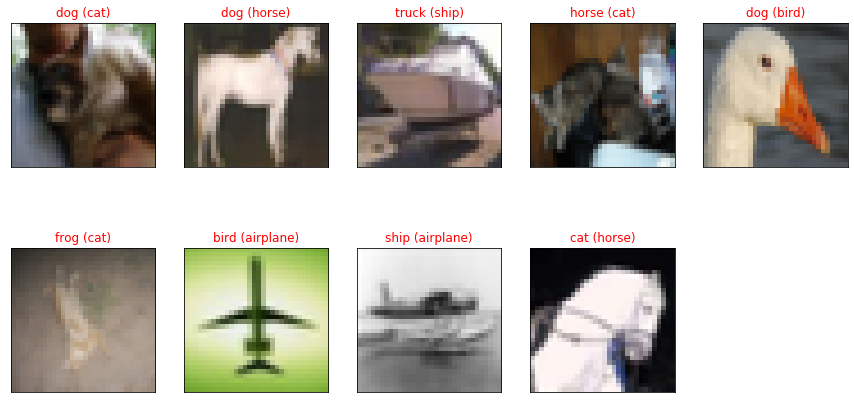

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

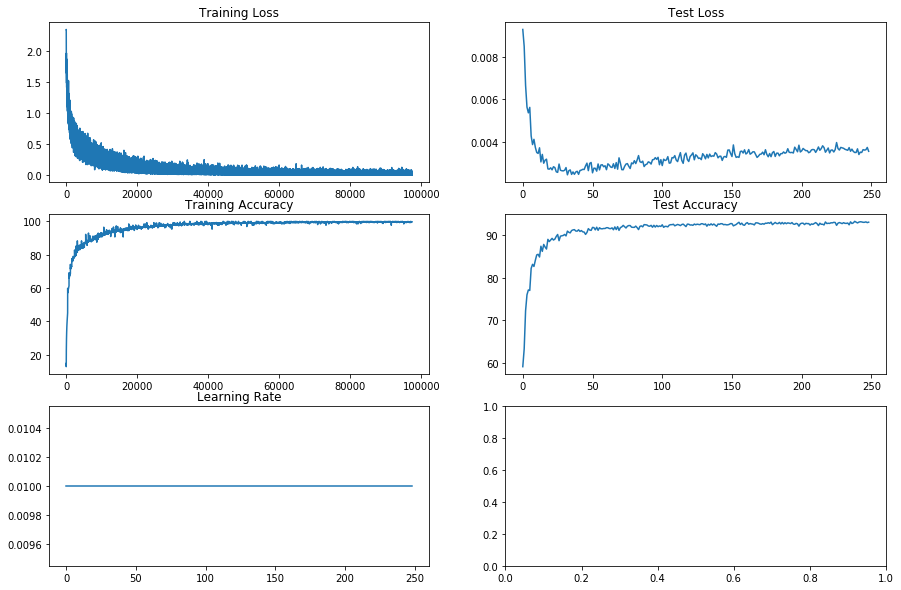

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [18]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)